In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
data = pd.read_csv("/home/server32/yongsu/fast-autoaugment/FastAutoAugment/result/mix_gr2_b1000_log/iter_acc.csv")

In [3]:
iter_ = data["iter"]
cnt = data["cnt"]
acc = data["acc"]
best = data["best"]
print(len(cnt))
print(len(acc))
print(len(best))

20000
20000
20000


In [4]:
from collections import defaultdict
cnts = defaultdict(dict)
accs = defaultdict(dict)
bests = defaultdict(dict)
unit = 2*1000
repeat = 1
gr_num = 2
cv_num=5
init_val = [1.,0.]
for r in range(repeat):
    for gr_id in range(gr_num):
        for cv_id in range(cv_num):
            s_idx = r*gr_num*cv_num*unit + gr_id*cv_num*unit + cv_id*unit
            e_idx = r*gr_num*cv_num*unit + gr_id*cv_num*unit + (cv_id+1)*unit
            idxes = [i for i,v in enumerate(list(cnt[s_idx:e_idx])) if v!=0]
            cnts[gr_id][cv_id] = [list(cnt[s_idx:e_idx])[i] for i in idxes]
            accs[gr_id][cv_id] = [list(acc[s_idx:e_idx])[i] for i in idxes]
            bests[gr_id][cv_id] = [list(best[s_idx:e_idx])[i] for i in idxes]

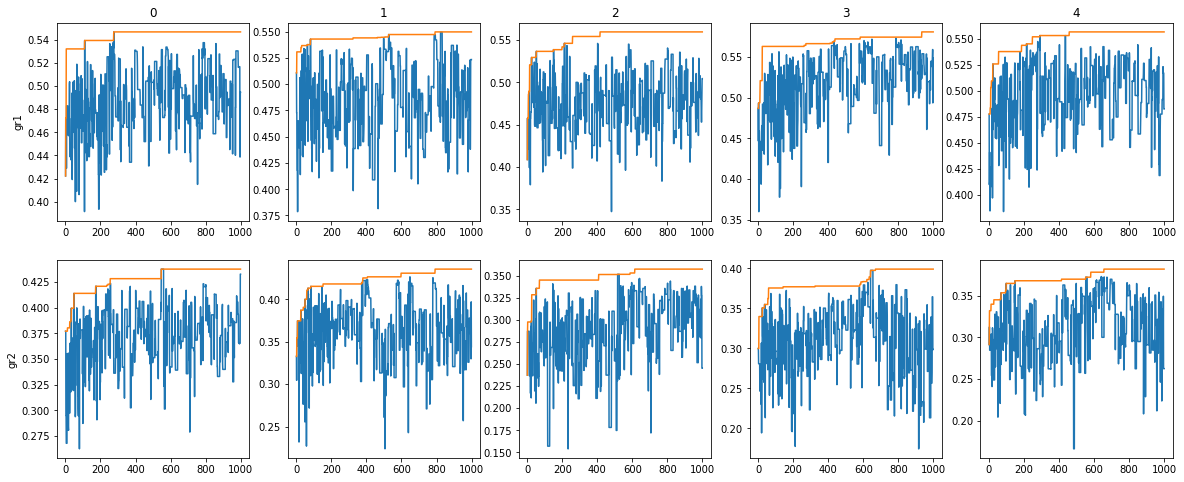

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(4*cv_num,4*gr_num*repeat))
for gr_id in range(gr_num):
    for cv_id in range(cv_num):
        axes[gr_id][cv_id].plot(cnts[gr_id][cv_id], accs[gr_id][cv_id], label="affinity")
        axes[gr_id][cv_id].plot(cnts[gr_id][cv_id], bests[gr_id][cv_id], label="best")
for cv_id, ax in enumerate(axes[0]):
    ax.set_title(str(cv_id))
for gr_id, ax in enumerate(axes[:,0]):
    ax.set_ylabel("gr{:}".format(gr_id+1))

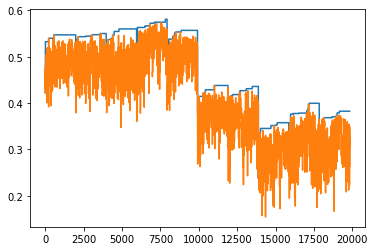

In [6]:
plt.plot([v for v in best if v not in init_val])
plt.plot([v for v in acc if v not in init_val])

In [14]:
_cnt = 25
for gr_id in range(gr_num):
    for cv_id in range(cv_num):
        iter_ = cnts[gr_id][cv_id].index(_cnt)
        print("gr{:} cv{:} init{:.4f} max{:.4f} top_max{:.4f}".format(gr_id, cv_id, accs[gr_id][cv_id][0], max(accs[gr_id][cv_id][:iter_]), max(accs[gr_id][cv_id][:200])))

gr0 cv0 init0.4223 max0.5037 top_max0.5188
gr0 cv1 init0.5106 max0.5106 top_max0.5429
gr0 cv2 init0.4087 max0.5187 top_max0.5366
gr0 cv3 init0.4866 max0.4934 top_max0.5538
gr0 cv4 init0.4775 max0.5257 top_max0.5323
gr1 cv0 init0.3772 max0.3772 top_max0.4140
gr1 cv1 init0.3326 max0.3745 top_max0.4152
gr1 cv2 init0.2373 max0.2988 top_max0.3356
gr1 cv3 init0.2999 max0.3507 top_max0.3687
gr1 cv4 init0.2914 max0.3124 top_max0.3649
